In [95]:
# DB
from questions.models import Solution, Cluster
from evaluation.models import SolutionConcept
from django.db.models import Count

# Helpers
import operator
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Cleaning database
last_id = 132
problems = Problem.objects.filter(id__gt=last_id)
solutions_obj = Solution.objects.filter(problem__in=problems).update(ignore=True)
print("Problems to be ignored: %d" % problems.count())

problems = Problem.objects.filter(id__lte=last_id)
# problems = Problem.objects.all()
print("Problems to be used: %d" % problems.count())

solutions_obj = Solution.objects.filter(problem__in=problems, ignore=False).order_by('id')
# solutions_obj = Solution.objects.all().order_by('id')
print("Solutions to be used: %d" % solutions_obj.count())

docs_id = []
questions = []
solutions = []

# Fill separated structures
for sol in solutions_obj:
    docs_id.append(sol.id)
    questions.append(sol.problem.content)
    solutions.append(sol.content)

print("Got %d documents" %(solutions_obj.count()))

Problems to be ignored: 591
Problems to be used: 132
Solutions to be used: 54
Got 54 documents


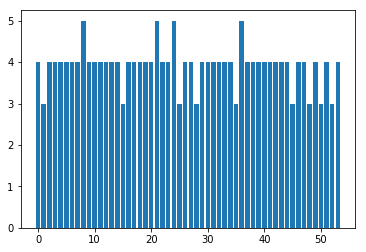

In [76]:
clusters = Cluster.objects.all()
solutions = Solution.objects.filter(ignore=False)
concepts = SolutionConcept.objects.all()
count = concepts.values_list('solution').annotate(count=Count('user', distinct=True))
x, y = zip(*list(count))
plt.bar(range(len(x)),y)
plt.show()

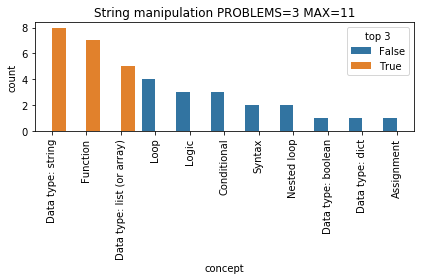

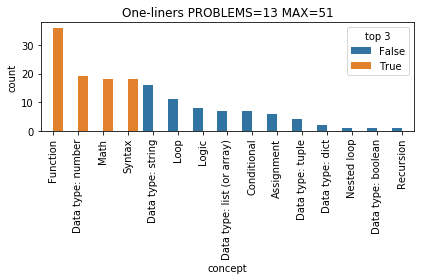

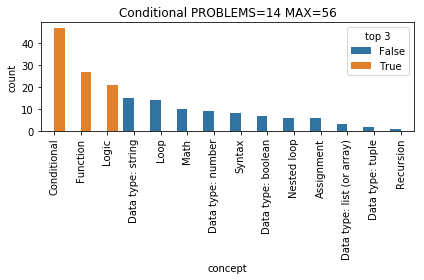

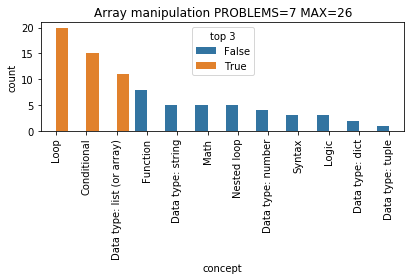

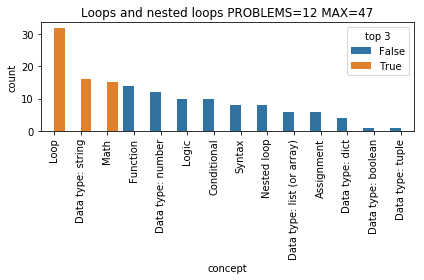

In [139]:
concept_solution = []
for cluster in clusters:
    solution_cluster = solutions.filter(cluster=cluster)
    concept_solution = concepts.filter(solution__in=solution_cluster)
    user_count = concept_solution.values_list('solution').annotate(count=Count('user', distinct=True))
    max_points = sum(list(zip(*user_count))[1])
    count = list(concept_solution.values_list('concept__label').annotate(count=Count('concept')))
    count.sort(key=operator.itemgetter(1), reverse=True)
    x, y = zip(*list(count))
    df = pd.DataFrame(count, columns=["concept", "count"])
    threshold = df.nlargest(3, 'count').tail(1)['count'].tolist()[0]
#     df['above threshold'] = df.apply(lambda x: True if x["count"] >= max_points/2 else False, axis=1)
    df['top 3'] = df.apply(lambda x: True if x["count"] >= threshold else False, axis=1)
    plt.title("%s PROBLEMS=%d MAX=%d" % (cluster.label, solution_cluster.count(), max_points))
#     sns.barplot(x='concept', y='count', hue='above threshold', data=df)
    sns.barplot(x='concept', y='count', hue='top 3', data=df)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()